# Google Data Analytics Capstone Project
## Cyclistic Case Study
### Anderson Chama
#### Date: 13/06/2024

### Introduction

For the capstone project of the Google Data Analytics certificate, I have chosen the Cyclistic bike share data to work on. For the case study, I will perform real-world tasks of a junior data analyst for the marketing team at Cyclistic, a fictional bike-share company in Chicago. To answer key business questions, I will follow the six steps of the data analysis process: Ask, Prepare, Process, Analyze, Share, and Act.

### The Scenario

The director of marketing of Cyclistic, Lily Moreno, believes that the company’s future growth depends on maximizing the number of annual memberships. Hence, the marketing analyst team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, the analytics team could design a new marketing strategy to convert casual riders into annual members.

Three questions will guide the future marketing campaign:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

I have been assigned by Moreno the first question.

### The Ask Phase

**Business Task:** Cyclistic has concluded that annual members are much more profitable than casual riders. So, we want to design marketing strategies and a campaign that helps us convert casual riders into annual members.

**Key Stakeholders:**
1. Lily Moreno: The director of marketing and my manager. Moreno has initiated this strategy.
2. The executive team: For Moreno’s idea to work, the executive team must approve our recommendations, so they must be backed up with compelling data insights and professional data visualizations.

### The Prepare Phase

**Data Source:**
Past 12 months of original bike share data set from 06/2023 to 05/2024 was extracted as 12 zipped .csv [files](https://divvy-tripdata.s3.amazonaws.com/index.html). The data is made available and licensed by Motivate International Inc under this [license](https://ride.divvybikes.com/data-license-agreement).

**Data Organization & Description:**
- File naming convention: YYYY_MM
- File Type: CSV format
- File Content: Each CSV file consists of 13 columns which contain information related to ride ID, rider type, ride start and end time, start and end location, etc. The number of rows varies between 49k to 531k from different Excel files.

**Data Credibility:**
- Reliable: The dataset is reliable, complete, and accurate for the chosen time window.
- Original: The data is original and is first-party information.
- Comprehensive: The dataset contains all information needed to answer the question.
- Current: Rider data of the last 12 months was used.
- Cited: The data is cited and vetted by the Chicago Department of Transportation.

**Data Security:** Riders’ personal identifiable information is hidden through tokenization. Original files are backed up in a separate folder.

**Data Limitations:** As riders’ personal identifiable information is hidden, we will not be able to connect past purchases to credit card numbers to determine if casual riders live in the Cyclistic service area or if they have purchased multiple single passes.


### The Process Phase

I used Python for data verification and cleaning due to the large size of the dataset which exceeds the limits of Excel.


In [1]:
# Install the necessary libraries
##!pip install matplotlib

# Importing necessary libraries
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# Read all CSV files from the directory
path = "../case_study/raw_data/"
all_files = glob.glob(path + "*.csv")

# Combine all CSV files into one DataFrame
data_frames = [pd.read_csv(file) for file in all_files]
all_trips = pd.concat(data_frames, ignore_index=True)

# Displaying column names of the combined DataFrame
print(all_trips.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


### The Analyze Phase
**Setting up the environment**

Several libraries are used to read, clean, organize, and analyze the data.

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Ensure all necessary libraries are installed
# !pip install pandas numpy matplotlib seaborn


In [3]:
# Load data files into DataFrame
data_01 = pd.read_csv("../case_study/raw_data/202306-divvy-tripdata.csv")
data_02 = pd.read_csv("../case_study/raw_data/202307-divvy-tripdata.csv")
data_03 = pd.read_csv("../case_study/raw_data/202308-divvy-tripdata.csv")
data_04 = pd.read_csv("../case_study/raw_data/202309-divvy-tripdata.csv")
data_05 = pd.read_csv("../case_study/raw_data/202310-divvy-tripdata.csv")
data_06 = pd.read_csv("../case_study/raw_data/202311-divvy-tripdata.csv")
data_07 = pd.read_csv("../case_study/raw_data/202312-divvy-tripdata.csv")
data_08 = pd.read_csv("../case_study/raw_data/202401-divvy-tripdata.csv")
data_09 = pd.read_csv("../case_study/raw_data/202402-divvy-tripdata.csv")
data_10 = pd.read_csv("../case_study/raw_data/202403-divvy-tripdata.csv")
data_11 = pd.read_csv("../case_study/raw_data/202404-divvy-tripdata.csv")
data_12 = pd.read_csv("../case_study/raw_data/202405-divvy-tripdata.csv")

### Combine Data
**Combine the 12 data sets into one DataFrame.**

In [4]:
# Combine all data frames
all_trips = pd.concat([data_01, data_02, data_03, data_04, data_05, 
                       data_06, data_07, data_08, data_09, data_10, data_11, data_12])

# Inspect the new table that has been created
print(all_trips.columns)  # List of column names
print(all_trips.shape)    # Dimensions of the DataFrame
print(all_trips.head())   # See the first 6 rows of the DataFrame
print(all_trips.info())   # See list of columns and data types (numeric, character, etc)


Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
(5743278, 13)
            ride_id  rideable_type           started_at             ended_at  \
0  6F1682AC40EB6F71  electric_bike  2023-06-05 13:34:12  2023-06-05 14:31:56   
1  622A1686D64948EB  electric_bike  2023-06-05 01:30:22  2023-06-05 01:33:06   
2  3C88859D926253B4  electric_bike  2023-06-20 18:15:49  2023-06-20 18:32:05   
3  EAD8A5E0259DEC88  electric_bike  2023-06-19 14:56:00  2023-06-19 15:00:35   
4  5A36F21930D6A55C  electric_bike  2023-06-19 15:03:34  2023-06-19 15:07:16   

  start_station_name start_station_id end_station_name end_station_id  \
0                NaN              NaN              NaN            NaN   
1                NaN              NaN              NaN            NaN   
2                NaN              Na

### Clean and Organize Data
**Add columns for date, month, day, day_of_week, and year of each ride.**

In [5]:
# Convert 'started_at' to datetime format
all_trips['started_at'] = pd.to_datetime(all_trips['started_at'])
all_trips['ended_at'] = pd.to_datetime(all_trips['ended_at'])

# Extract date information
all_trips['date'] = all_trips['started_at'].dt.date
all_trips['month'] = all_trips['started_at'].dt.month
all_trips['day'] = all_trips['started_at'].dt.day
all_trips['year'] = all_trips['started_at'].dt.year
all_trips['day_of_week'] = all_trips['started_at'].dt.dayofweek

# Add ride_length in seconds and minutes
all_trips['ride_length'] = (all_trips['ended_at'] - all_trips['started_at']).dt.total_seconds()
all_trips['ride_length_m'] = all_trips['ride_length'] / 60

# Inspect the structure of the newly added columns
print(all_trips.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5743278 entries, 0 to 609492
Data columns (total 20 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  date                object        
 14  month               int64         
 15  day                 int64         
 16  year                int64         
 17  day_of_week         int64         
 18  ride_length         float64       
 19  ride_length_m       float64       
dtypes: 

### Convert Data Types
Convert columns to numeric for calculations.

In [6]:
# Convert necessary columns to numeric
all_trips['ride_length'] = pd.to_numeric(all_trips['ride_length'], errors='coerce')
all_trips['ride_length_m'] = pd.to_numeric(all_trips['ride_length_m'], errors='coerce')
all_trips['month'] = pd.to_numeric(all_trips['month'], errors='coerce')
all_trips['day'] = pd.to_numeric(all_trips['day'], errors='coerce')

# Check if conversion was successful
print(all_trips[['ride_length', 'ride_length_m', 'month', 'day']].dtypes)


ride_length      float64
ride_length_m    float64
month              int64
day                int64
dtype: object


### Remove Negative Ride Lengths
**Filter out rows with negative ride lengths.**

In [7]:
# Remove negative ride lengths
all_trips = all_trips[all_trips['ride_length'] >= 0]


### Descriptive Analysis on Ride Length
Perform descriptive analysis on ride length.

count    5.742837e+06
mean     1.836975e+01
std      1.674247e+02
min      0.000000e+00
25%      5.533333e+00
50%      9.700000e+00
75%      1.720000e+01
max      9.848907e+04
Name: ride_length_m, dtype: float64


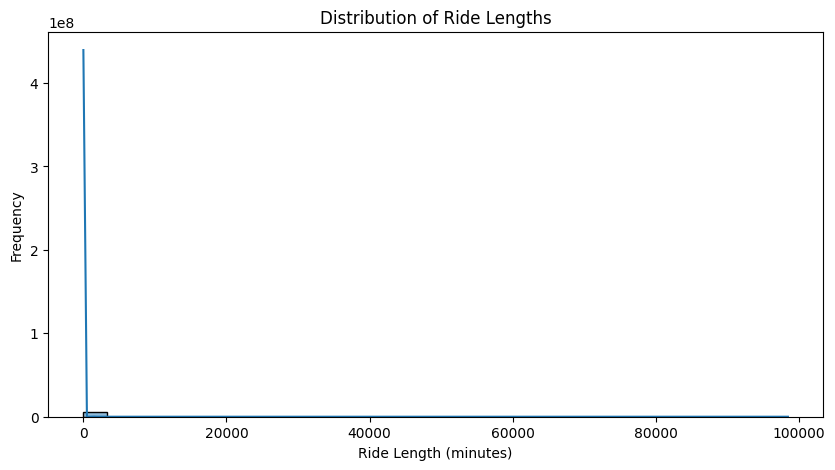

In [8]:
# Descriptive analysis on ride length
summary_stats = all_trips['ride_length_m'].describe()
print(summary_stats)

# Plot the distribution of ride lengths
plt.figure(figsize=(10, 5))
sns.histplot(all_trips['ride_length_m'], bins=30, kde=True)
plt.title('Distribution of Ride Lengths')
plt.xlabel('Ride Length (minutes)')
plt.ylabel('Frequency')
plt.show()


### Analyze Ride Patterns
Analyze ride patterns by day of the week.

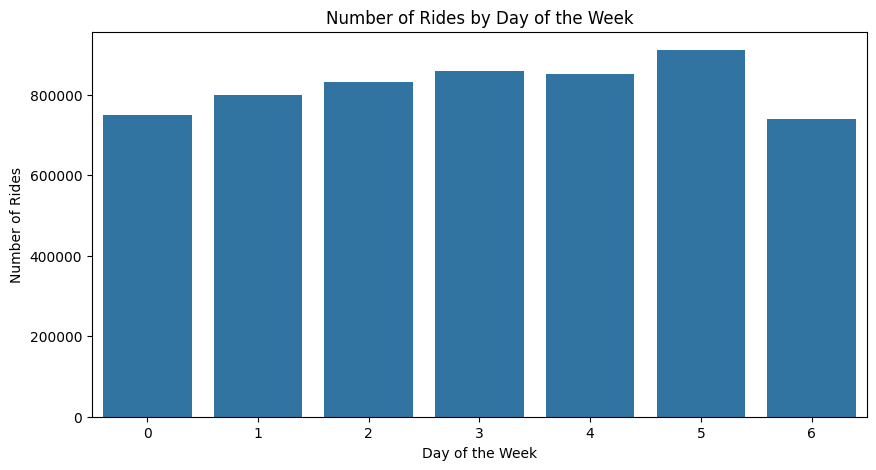

In [9]:
# Number of rides by day of the week
rides_by_day = all_trips.groupby('day_of_week').size().reset_index(name='number_of_rides')

# Plot number of rides by day of the week
plt.figure(figsize=(10, 5))
sns.barplot(x='day_of_week', y='number_of_rides', data=rides_by_day)
plt.title('Number of Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.show()


### Analyze Ride Patterns by User Type

Compare ride patterns between casual riders and annual members.

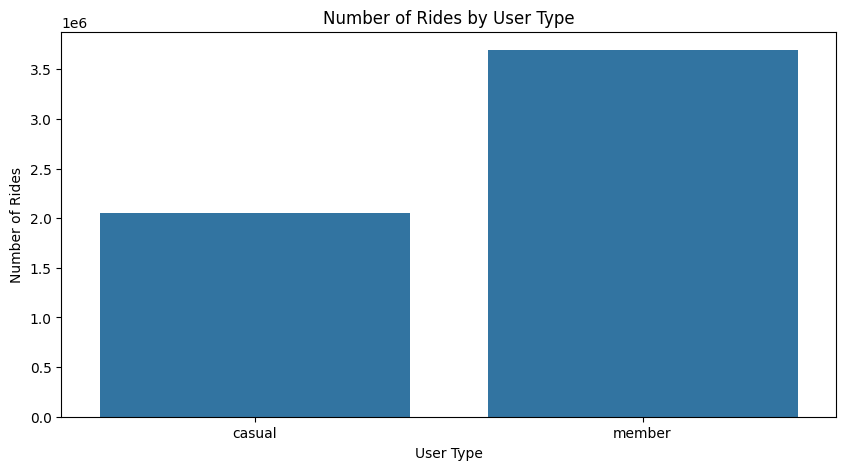

In [10]:
# Number of rides by user type
rides_by_user_type = all_trips.groupby('member_casual').size().reset_index(name='number_of_rides')

# Plot number of rides by user type
plt.figure(figsize=(10, 5))
sns.barplot(x='member_casual', y='number_of_rides', data=rides_by_user_type)
plt.title('Number of Rides by User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Rides')
plt.show()

### Analyze average ride length by user type and day of the week.

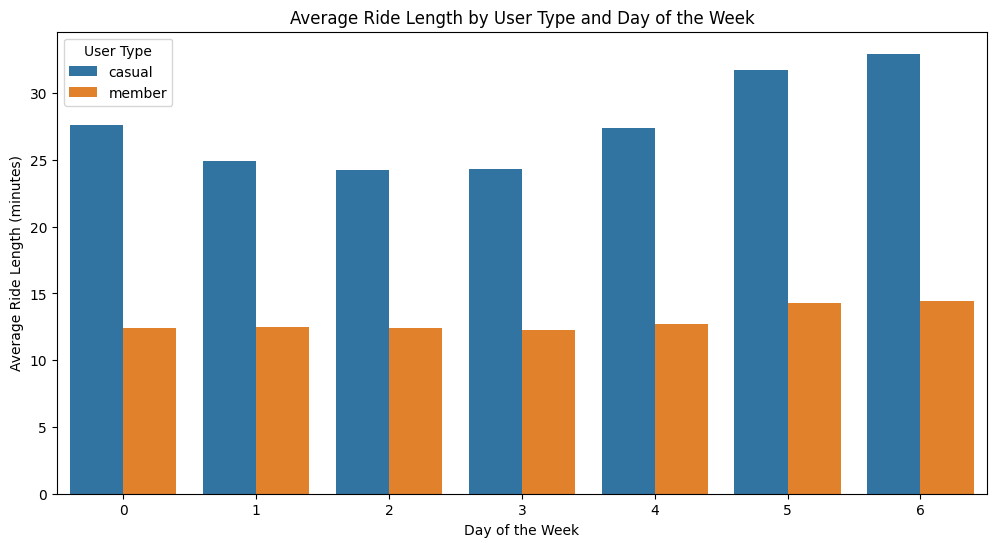

In [11]:
# Average ride length by user type and day of the week
avg_ride_length_by_day = all_trips.groupby(['member_casual', 'day_of_week'])['ride_length_m'].mean().reset_index()

# Plot average ride length by user type and day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='ride_length_m', hue='member_casual', data=avg_ride_length_by_day)
plt.title('Average Ride Length by User Type and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Length (minutes)')
plt.legend(title='User Type')
plt.show()


## The Share Phase
### Key Findings
**Number of Rides by User Type:**

Casual riders have fewer rides compared to annual members.

**Average Ride Length:**

Casual riders have longer average ride lengths compared to annual members across all days of the week.
Both casual riders and annual members show a pattern in ride length with variations across different days of the week.

**Ride Patterns:**

Casual riders have a higher number of rides during weekends compared to weekdays.
Annual members maintain a consistent number of rides throughout the week with slight variations.

## Visualizations

### Number of Rides by User Type

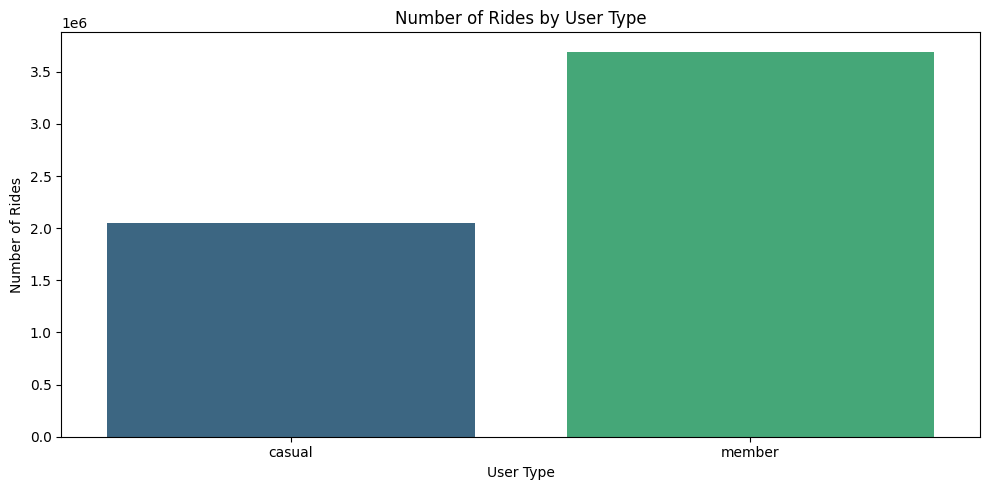

In [15]:
# Number of rides by user type
rides_by_user_type = all_trips.groupby('member_casual').size().reset_index(name='number_of_rides')

# Plot number of rides by user type
plt.figure(figsize=(10, 5))
sns.barplot(x='member_casual', y='number_of_rides', hue='member_casual', data=rides_by_user_type, palette='viridis', dodge=False)
plt.title('Number of Rides by User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.legend([],[], frameon=False)  # Hide the legend
plt.tight_layout()
plt.savefig('number_of_rides_by_user_type.png')
plt.show()


### Average Ride Length by User Type and Day of the Week

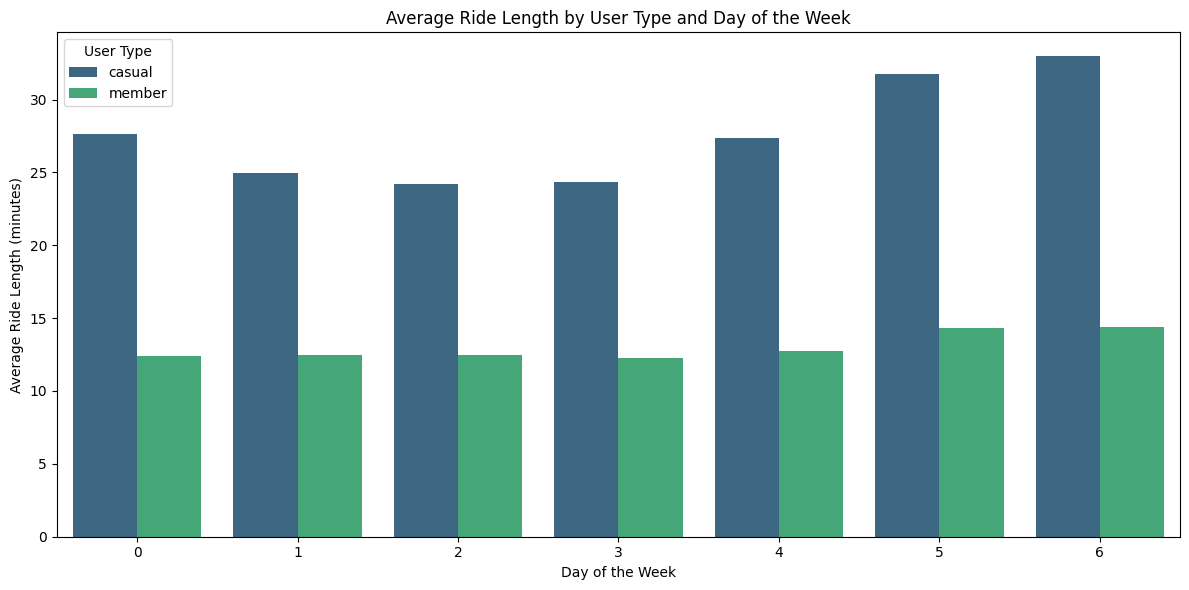

In [13]:
# Average ride length by user type and day of the week
avg_ride_length_by_day = all_trips.groupby(['member_casual', 'day_of_week'])['ride_length_m'].mean().reset_index()

# Plot average ride length by user type and day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='ride_length_m', hue='member_casual', data=avg_ride_length_by_day, palette='viridis')
plt.title('Average Ride Length by User Type and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Length (minutes)')
plt.legend(title='User Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('avg_ride_length_by_day.png')
plt.show()


### Number of Rides by Season, Day of the Week, and User Type

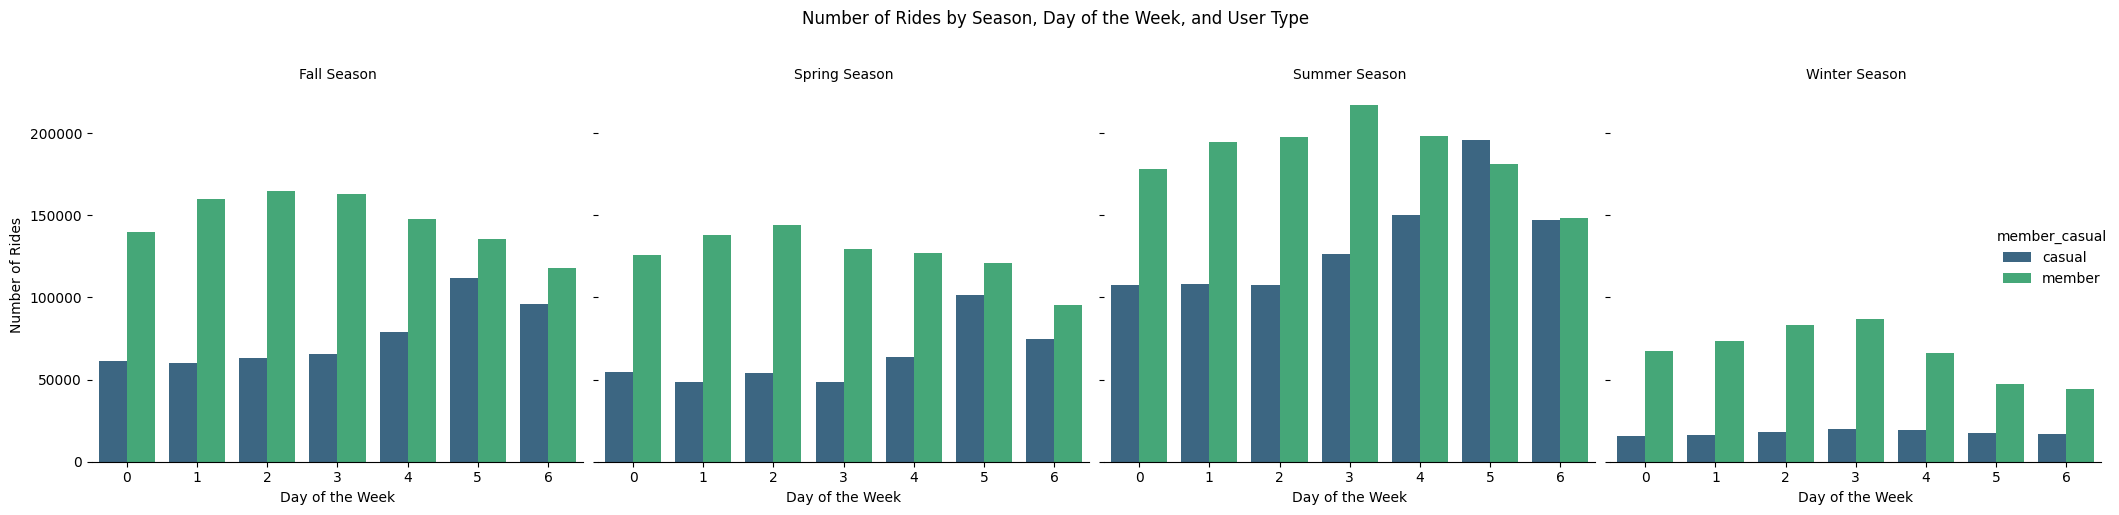

In [14]:
# Assign season to months
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

all_trips['season'] = all_trips['month'].apply(assign_season)

# Number of rides by season, day of the week, and user type
rides_by_season = all_trips.groupby(['season', 'day_of_week', 'member_casual']).size().reset_index(name='number_of_rides')

# Plot number of rides by season, day of the week, and user type
g = sns.catplot(x='day_of_week', y='number_of_rides', hue='member_casual', col='season', data=rides_by_season, kind='bar', height=5, aspect=1, palette='viridis')
g.set_titles('{col_name} Season')
g.set_axis_labels('Day of the Week', 'Number of Rides')
g.fig.suptitle('Number of Rides by Season, Day of the Week, and User Type', y=1.02)
g.despine(left=True)
plt.tight_layout()
g.savefig('number_of_rides_by_season.png')
plt.show()


## The Act Phase

### Recommendations

Based on the analysis, here are some recommendations to convert casual riders into annual members:

**Weekend Promotions:**

Since casual riders have higher usage during weekends, offer weekend promotions or discounts on annual memberships to attract these riders.

**Long Ride Incentives:**

Casual riders tend to have longer ride lengths. Introduce incentives for longer rides exclusive to annual members, such as reduced fees for rides over a certain duration.

**Targeted Marketing Campaigns:**


Use digital media to target casual riders with advertisements highlighting the benefits of annual memberships, including cost savings and exclusive perks.

**Referral Programs:**

Implement referral programs where current annual members can refer casual riders and both receive benefits, such as free ride credits or discounts on membership renewal.

**Enhanced User Experience:**

Improve the overall user experience by ensuring bike availability and quality, especially during peak times and weekends, to encourage casual riders to see the value in becoming annual members.

**Feedback and Engagement:**

Gather feedback from casual riders on what features or benefits would entice them to become annual members. Use this feedback to tailor membership plans and marketing strategies.

## Conclusion

The analysis provided insights into the usage patterns of casual riders and annual members. By leveraging these insights, Cyclistic can design effective marketing strategies to convert casual riders into annual members, thereby maximizing profitability and enhancing user experience.